In [1]:
!pip install deepface

  Using cached gdown-4.2.0-py3-none-any.whl
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


You should consider upgrading via the 'c:\users\91992\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import sys
import numpy as np
import cv2
import os
from datetime import datetime
# from deepface import DeepFace
# from deepface.commons import functions, realtime
from tqdm import tqdm
import matplotlib.pyplot as plt
# from deepface.detectors import FaceDetector

In [2]:
# model = DeepFace.build_model("Facenet")

In [3]:
path = '../db_path/Rishav'

In [7]:
cap = cv2.VideoCapture(0)
faces = 0
frames = 0
max_faces = 50
max_bbox = np.zeros(4)

while faces < max_faces:
    ret, frame = cap.read()
    frames += 1
    
    dtString = str(datetime.now().microsecond)
    if not (os.path.exists(path)):
        os.makedirs(path)
#     if frames % 3 == 0:
#         cv2.imwrite(os.path.join(path, "{}.jpg".format(dtString)), frame)
    print(frame.shape)
    cv2.imshow("Face detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [9]:
realtime.analysis(path)

Detector backend is  opencv
vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: C:\Users\91992\.deepface\weights\vgg_face_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 580M/580M [05:05<00:00, 1.90MB/s]


VGG-Face  is built
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\91992\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:01<00:00, 3.85MB/s]


Emotion model loaded
age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\91992\.deepface\weights\age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 539M/539M [03:20<00:00, 2.69MB/s]


Age model loaded
gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\91992\.deepface\weights\gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [04:22<00:00, 2.04MB/s]
Finding embedding for 155701.jpg:   0%|                                                         | 0/73 [00:00<?, ?it/s]

Gender model loaded
Facial attibute analysis models loaded in  522.2303681373596  seconds


Finding embedding for 980432.jpg: 100%|████████████████████████████████████████████████| 73/73 [01:18<00:00,  1.07s/it]


Embeddings found for given data set in  78.26320600509644  seconds


  0%|                                                                                           | 0/74 [00:00<?, ?it/s]

128


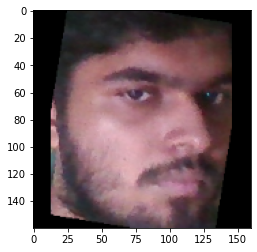

  0%|                                                                                           | 0/74 [00:05<?, ?it/s]


In [5]:
length = len(os.listdir(path))
images = os.listdir(path)
for i in tqdm(range(0, length)):
    image_path = os.path.join(path,images[i])
    img = functions.preprocess_face(image_path, target_size= (160, 160), detector_backend= 'mtcnn')
    embedding = model.predict(img)[0].tolist() 
#     img = DeepFace.detectFace(image_path, detector_backend= 'mtcnn')
    print(len(embedding))
    plt.imshow(img[0][:,:,::-1])
    plt.show()
#     cv2.imshow("image", img)
    break

## Get the Face Embeddings for different models

In [5]:
cap = cv2.VideoCapture(0)
faces = 0
frames = 0
max_faces = 10
max_bbox = np.zeros(4)
model = DeepFace.build_model("Facenet")
while faces < max_faces:
    ret, frame = cap.read()
    frames += 1
    
    dtString = str(datetime.now().microsecond)
#     if not (os.path.exists(path)):
#         os.makedirs(path)
    if frames % 3 == 0:
        try:
            img = functions.preprocess_face(frame, target_size= (model.input_shape[1], model.input_shape[2]), detector_backend= 'mtcnn', enforce_detection= False)
            embedding = model.predict(img)[0].tolist()
            print(len(embedding))
            
            faces += 1
        except Exception as e:
            print(e)
            continue
    cv2.imshow("Face detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

128
128
128
128
128


In [3]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
Block17_8_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_8_Branch_0_Conv2d_1x1_Act
                                                                 Block17_8_Branch_8_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_8_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_8_Concatenate[0][0]      
__________________________________________________________________________________________________
lambda_12 (Lambda)              (None, 8, 8, 896)    0           Block17_8_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
add_12 (Add)                    (None, 8, 8, 896)    0           Block17_7_Activation[0][0]       
                                                                 lambda_12[0][0]                  
__________

In [14]:
t = (1, 160, 160, 3)
s = t[1], t[2], t[3]

In [5]:
(shape[1], shape[2], shape[3])

(160, 160, 3)

In [16]:
type(img)

numpy.ndarray

In [18]:
img1 = np.reshape(img, (shape[1], shape[2], shape[3]))

In [19]:
img1.shape

(160, 160, 3)

In [29]:
type(img1)

numpy.ndarray

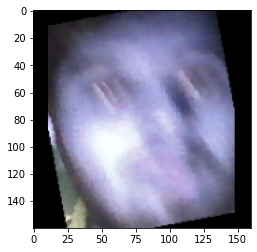

In [26]:
plt.imshow(img1)

In [23]:
embedding = model.predict(img)[0].tolist()
len(embedding)

128

In [4]:
g = cv2.imread(path + '25181.jpg')

In [32]:
cv2.imshow("adad", g)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_xlv4eex\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [5]:
print(g)

None


In [10]:
faces = FaceDetector.detect_faces(face_detector, detector_backend = 'mtcnn',img, align = False)

SyntaxError: positional argument follows keyword argument (<ipython-input-10-d317f587caf9>, line 1)

## To detect and extract Face crops

In [35]:
from deepface.detectors import FaceDetector
from deepface import DeepFace
import sys
import numpy as np
import cv2
import os
from tqdm import tqdm
from datetime import datetime
detector_backend = 'mtcnn'
face_detector = FaceDetector.build_model(detector_backend)

In [36]:
cap = cv2.VideoCapture(0)
faces1= 0
frames = 0
max_faces = 50
max_bbox = np.zeros(4)
model = DeepFace.build_model("Facenet")
embeddings_list = []
while faces1 < max_faces:
    ret, frame = cap.read()
    frames += 1
    dtString = str(datetime.now().microsecond)
#     if not (os.path.exists(path)):
#         os.makedirs(path)
    if frames % 3 == 0:
        faces = FaceDetector.detect_faces(face_detector, detector_backend, frame, align=False)
    #         obj = DeepFace.analyze(faces[0][0], enforce_detection= False)
        try:
            img = functions.preprocess_face(frame, target_size= (model.input_shape[1], model.input_shape[2]), detector_backend= 'mtcnn', enforce_detection= False)
            embedding = model.predict(img)[0].tolist()
            embeddings_list.append(embedding)
#             print(embeddings_list)

    #             faces += 1
        except Exception as e:
            print(e)
            continue

    #         print(obj)
        for face, (x, y, w, h) in faces:
    #           plt.imshow(face)
            cv2.rectangle(frame, (x,y), (x+w,y+h), (67,67,67), 3)
    #             cv2.imwrite(os.path.join(path, "{}.jpg".format(dtString)), face)

    #         print('Face detected')
    faces1 += 1
    cv2.imshow("Face detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

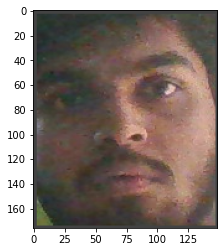

In [12]:
plt.imshow(faces[0][0])

In [37]:
len(embeddings_list)

5

## Generate Embeddings

In [31]:
def print_exams_average(myList):
    exams_avg = np.mean(myList, axis=0)
    return exams_avg

In [32]:
print(print_exams_average(embeddings_list))

[ 0.86710329  0.92936847 -0.10402345 -1.31323526 -0.39748059  1.72073285
 -0.22955264  0.17357241  0.49570412 -0.33385631 -0.14818532 -0.46657398
  0.26113596 -0.30727909  0.99933753 -0.00462759  0.18871645 -0.58359764
  0.77120056 -1.63329547 -0.78585677 -0.39682184  0.75836341 -0.16656417
 -0.24585597 -0.92360489  0.04760643 -0.22489822 -2.03985328  0.18648966
 -1.27316305 -1.6792898   0.02540852 -0.15638581  1.57504508  0.87044772
  0.07178774  0.43720561  0.54004987  0.11292859 -0.18354878  0.12325651
 -0.38845743 -0.01179672 -0.63570661 -1.09337552 -0.08957838  0.42447401
  1.19002804 -0.34382934  0.09504485  0.4903756   0.92380309 -1.03264731
  1.58009389  0.2076394   0.38100068 -0.05857224 -0.5799789  -0.09985129
  0.03944064 -0.1206127   0.4852353   0.65295458  1.16818985  0.57264192
 -0.74804313  0.66304165 -0.57812984  1.47683609  1.28637395  1.40896274
 -0.864202   -1.15555003  0.19140179  0.84993045 -1.76864141  0.80000416
 -0.32582857 -0.07210364 -0.48465661  0.85395878  0

## Feature age, gender, facial expression, race

Detect, process_face and then load model.

In [3]:
from deepface import DeepFace
from deepface.commons import functions
from deepface.detectors import FaceDetector

In [4]:
from deepface.detectors import FaceDetector
from deepface import DeepFace
import sys
import numpy as np
import cv2
import pandas as pd
import os
from tqdm import tqdm
from datetime import datetime
from deepface.extendedmodels import Age
detector_backend = 'mtcnn'
face_detector = FaceDetector.build_model(detector_backend)

In [5]:
# Models
emotion_model = DeepFace.build_model('Emotion')
print("Emotion model loaded")

age_model = DeepFace.build_model('Age')
print("Age model loaded")

gender_model = DeepFace.build_model('Gender')
print("Gender model loaded")

Emotion model loaded
Age model loaded
Gender model loaded


In [6]:
cap = cv2.VideoCapture(0)
faces_1 = 0
frames = 0
max_faces = 10
max_bbox = np.zeros(4)
model = DeepFace.build_model("Facenet")
while faces_1 < max_faces:
    ret, frame = cap.read()
    frames += 1
    
    dtString = str(datetime.now().microsecond)
#     if not (os.path.exists(path)):
#         os.makedirs(path)
    try:
        faces = FaceDetector.detect_faces(face_detector, detector_backend, frame, align=False)
        face_index = 0
        detected_faces = []
        img = frame.copy()
        for face, (x, y, w, h) in faces:
            if w > 130: #discard small detected faces
                cv2.rectangle(frame, (x,y), (x+w,y+h), (67,67,67), 1) #draw rectangle to main image
                detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face

                detected_faces.append((x,y,w,h))
                detected_faces_final = detected_faces.copy()
#                     face_index = face_index + 1
                for detected_face in detected_faces_final:
                    x = detected_face[0]; y = detected_face[1]
                    w = detected_face[2]; h = detected_face[3]

                    cv2.rectangle(frame, (x,y), (x+w,y+h), (67,67,67), 1) #draw rectangle to main image


                    custom_face = img[y:y+h, x:x+w]

                    gray_img = functions.preprocess_face(custom_face, target_size=(48, 48), detector_backend= detector_backend,grayscale = True, enforce_detection= False)
#                         print(gray_img)
                    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
                    emotion_predictions = emotion_model.predict(gray_img)[0,:]
                    sum_of_predictions = emotion_predictions.sum()
                    mood_items = []
                    for i in range(0, len(emotion_labels)):
                            mood_item = []
                            emotion_label = emotion_labels[i]
                            emotion_prediction = 100 * emotion_predictions[i] / sum_of_predictions
                            mood_item.append(emotion_label)
                            mood_item.append(emotion_prediction)
                            mood_items.append(mood_item)

                    emotion_df = pd.DataFrame(mood_items, columns = ["emotion", "score"])
                    emotion_df = emotion_df.sort_values(by = ["score"], ascending=False).reset_index(drop=True)
                    overlay = img.copy()
                    opacity = 0.4
                    pivot_img_size = 112
                    resolution = img.shape; resolution_x = img.shape[1]; resolution_y = img.shape[0]
                    freeze_img = img.copy()
                    if x+w+pivot_img_size < resolution_x:
#                         print('if 1')

                        cv2.rectangle(frame
                            #, (x+w,y+20)
                            , (x+w,y)
                            , (x+w+pivot_img_size, y+h)
                            , (64,64,64),cv2.FILLED)

                        cv2.addWeighted(overlay, opacity, img, 1 - opacity, 0, img)

                    elif x-pivot_img_size > 0:
#                         print('else 1')
                        cv2.rectangle(img
                                , (x-pivot_img_size,y)
                                , (x, y+h)
                                , (64,64,64),cv2.FILLED)   
                        cv2.addWeighted(overlay, opacity, freeze_img, 1 - opacity, 0, freeze_img)

                    for index, instance in emotion_df.iterrows():
                        emotion_label = "%s " % (instance['emotion'])
                        emotion_score = instance['score']/100

                        bar_x = 35 #this is the size if an emotion is 100%
                        bar_x = int(bar_x * emotion_score)

                        if x+w+pivot_img_size < resolution_x:
#                             print('if2')

                            text_location_y = y + 20 + (index+1) * 20
                            text_location_x = x+w

                            if text_location_y < y + h:
                                cv2.putText(frame, emotion_label, (text_location_x, text_location_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
#                                 print('text')
                                cv2.rectangle(frame
                                    , (x+w+70, y + 13 + (index+1) * 20)
                                    , (x+w+70+bar_x, y + 13 + (index+1) * 20 + 5)
                                    , (255,255,255), cv2.FILLED)

                        elif x-pivot_img_size > 0:
#                             print('else2')

                            text_location_y = y + 20 + (index+1) * 20
                            text_location_x = x-pivot_img_size

                            if text_location_y <= y+h:
                                cv2.putText(frame, emotion_label, (text_location_x, text_location_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

                                cv2.rectangle(frame
                                    , (x-pivot_img_size+70, y + 13 + (index+1) * 20)
                                    , (x-pivot_img_size+70+bar_x, y + 13 + (index+1) * 20 + 5)
                                    , (255,255,255), cv2.FILLED)
                    
                    #----------------------------------------------------------------------------------------
                    # Age Prediction
                    #----------------------------------------------------------------------------------------
                    face_224 = functions.preprocess_face(custom_face, target_size =(224, 224), grayscale = False, enforce_detection = False, detector_backend = detector_backend)
                    age_predictions = age_model.predict(face_224)[0,:]
                    apparent_age = Age.findApparentAge(age_predictions)
                    
                    #----------------------------------------------------------------------------------------
                    # Gender Prediction
                    #----------------------------------------------------------------------------------------
                    gender_prediction = gender_model.predict(face_224)[0,:]

                    if np.argmax(gender_prediction) == 0:
                        gender = "W"
                    elif np.argmax(gender_prediction) == 1:
                        gender = "M"

                    analysis_report = str(int(apparent_age))+" "+gender
                    
                    #-----------------------------------------------------------------------------------------
                    # Draw Boxes Age and Gender
                    #-----------------------------------------------------------------------------------------
                    info_box_color = (46,200,255)

                    #top
                    if y - pivot_img_size + int(pivot_img_size/5) > 0:

                        triangle_coordinates = np.array( [
                            (x+int(w/2), y)
                            , (x+int(w/2)-int(w/10), y-int(pivot_img_size/3))
                            , (x+int(w/2)+int(w/10), y-int(pivot_img_size/3))
                        ] )

                        cv2.drawContours(frame, [triangle_coordinates], 0, info_box_color, -1)

                        cv2.rectangle(frame, (x+int(w/5), y-pivot_img_size+int(pivot_img_size/5)), (x+w-int(w/5), y-int(pivot_img_size/3)), info_box_color, cv2.FILLED)

                        cv2.putText(frame, analysis_report, (x+int(w/3.5), y - int(pivot_img_size/2.1)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 111, 255), 2)

                    #bottom
                    elif y + h + pivot_img_size - int(pivot_img_size/5) < resolution_y:

                        triangle_coordinates = np.array( [
                            (x+int(w/2), y+h)
                            , (x+int(w/2)-int(w/10), y+h+int(pivot_img_size/3))
                            , (x+int(w/2)+int(w/10), y+h+int(pivot_img_size/3))
                        ] )

                        cv2.drawContours(frame, [triangle_coordinates], 0, info_box_color, -1)

                        cv2.rectangle(frame, (x+int(w/5), y + h + int(pivot_img_size/3)), (x+w-int(w/5), y+h+pivot_img_size-int(pivot_img_size/5)), info_box_color, cv2.FILLED)

                        cv2.putText(frame, analysis_report, (x+int(w/3.5), y + h + int(pivot_img_size/1.5)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 111, 255), 2)
                    
    
        faces_1 += 1
    except Exception as e:
        print(e)
        continue
    cv2.imshow("Face detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [11]:
gender_prediction

NameError: name 'gender_prediction' is not defined

In [8]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 128)         1

In [2]:
pwd

'C:\\Users\\91992\\DLCVNLP\\CV_Projects\\Deepface_facerecog'

In [1]:
%cd ..

C:\Users\91992\DLCVNLP\CV_Projects\Deepface_facerecog


In [ ]:
%cd ..

## Enable Elastic Search

In [13]:
from elasticsearch import Elasticsearch

In [14]:
es = Elasticsearch([{'host': 'localhost', 'port': '9200'}])

In [11]:
# es.index()

In [15]:
es.delete_by_query(index='face_recognition', body={"query": {"match_all": {}}})

{'took': 60,
 'timed_out': False,
 'total': 0,
 'deleted': 0,
 'batches': 0,
 'version_conflicts': 0,
 'noops': 0,
 'retries': {'bulk': 0, 'search': 0},
 'throttled_millis': 0,
 'requests_per_second': -1.0,
 'throttled_until_millis': 0,
 'failures': []}

In [14]:
es.count()

<bound method Elasticsearch.count of <Elasticsearch([{'host': 'localhost', 'port': '9200'}])>>

In [9]:
mapping = {
    "mappings": {
        "properties": {
            "title_vector":{
                "type": "dense_vector",
                "dims": 128
            },
            "title_name": {"type": "keyword"}
        }
    }
}
 
es.indices.create(index="face_recognition", body=mapping)


{'acknowledged': True,
 'shards_acknowledged': True,
 'index': 'face_recognition'}

In [34]:
name = 'Tanu'
index = 1
average_embeddings = print_exams_average(embeddings_list)
doc = {"title_vector": average_embeddings, "title_name": name}
es.create("face_recognition", id=index, body=doc)

{'_index': 'face_recognition',
 '_type': '_doc',
 '_id': '1',
 '_version': 1,
 'result': 'created',
 '_shards': {'total': 2, 'successful': 1, 'failed': 0},
 '_seq_no': 1,
 '_primary_term': 1}

In [38]:
embeddings_list[2]

[1.156053900718689,
 0.990973949432373,
 0.43409380316734314,
 -1.206740140914917,
 -0.030210494995117188,
 1.2985484600067139,
 -0.10690899193286896,
 0.4578419327735901,
 1.1249290704727173,
 -1.2151025533676147,
 -0.7892775535583496,
 -0.5856021046638489,
 0.4464077353477478,
 -0.02331461012363434,
 0.5127729773521423,
 -0.3127846121788025,
 0.14464077353477478,
 -0.750462532043457,
 0.7617217898368835,
 -2.429431438446045,
 -1.470622181892395,
 -0.2895181179046631,
 0.7129691243171692,
 0.375216543674469,
 -0.15016208589076996,
 -0.2811424136161804,
 0.21950706839561462,
 0.008129671216011047,
 -2.0971157550811768,
 0.29718950390815735,
 -1.6263059377670288,
 -2.5307059288024902,
 0.6554160118103027,
 -0.1821000576019287,
 1.3049368858337402,
 1.3072177171707153,
 0.38232049345970154,
 0.9352554082870483,
 0.32295548915863037,
 1.1391406059265137,
 0.07946605980396271,
 -0.17439192533493042,
 -0.5966697931289673,
 -0.49976521730422974,
 -0.827663242816925,
 -0.35405582189559937,
 -

## Search simmilarity

In [8]:
query = {
    "size": 5,
    "query": {
    "script_score": {
        "query": {
            "match_all": {}
        },
        "script": {
            "source": "cosineSimilarity(params.queryVector, 'title_vector') + 1.0",
# #             "source": "1 / (1 + l2norm(params.queryVector, 'title_vector'))", #euclidean distance
            "params": {
                "queryVector": list(embeddings_list[2])
            }
        }
    }
}}

In [9]:
res = es.search(index="face_recognition", body=query)

c:\users\91992\appdata\local\programs\python\python37\lib\site-packages\elasticsearch\connection\base.py:190: ElasticsearchDeprecationWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.15/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchDeprecationWarning)


RequestError: RequestError(400, 'illegal_argument_exception', 'Required [script]')

In [42]:
scores_candidate = {}
for i in res["hits"]["hits"]:
    candidate_name = i["_source"]["title_name"]
    candidate_score = i["_score"]
    scores_candidate[candidate_name] = candidate_score
    print(candidate_name, ": ", candidate_score)

Tanu :  1.8782322
Rishav :  1.1676464


In [47]:
scores_candidate

{'Tanu': 1.8782322, 'Rishav': 1.1676464}

In [50]:
Keymax = max(zip(scores_candidate.values(), scores_candidate.keys()))[1]
print(f"The face is predicted as {Keymax} with {scores_candidate[Keymax]}")

The face is predicted as Tanu with 1.8782322
